In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [5]:
data = pd.read_csv('/Users/derya_ak/Desktop/marketing_sales_data.csv')

In [9]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


In [14]:
# calculate the mean sales for each TV category

data.groupby('TV')['Sales'].mean()

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64

In [13]:
# calculate the mean sales for each Influencer category

data.groupby('Influencer')['Sales'].mean()

Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64

In [15]:
# drop rows that contain missing data and update the dataframe.

data = data.dropna(axis=0)

In [16]:
# eename all columns in data that contain a space because ols() function doesn't run 
#when variable names contain a space

data = data.rename(columns={'Social Media': 'Social_Media'})

In [17]:
data.head()

,TV,Radio,Social_Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


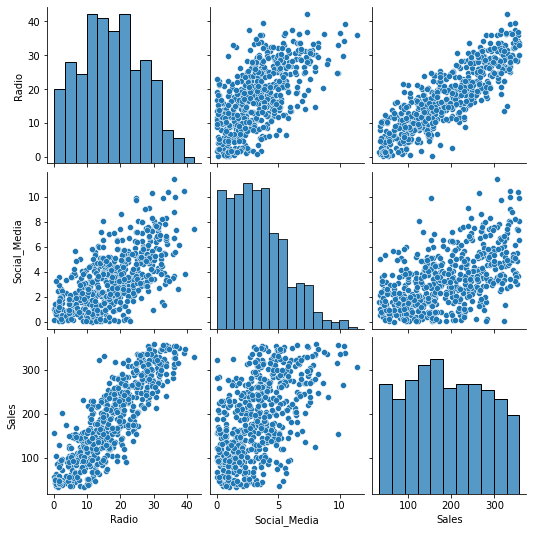

In [28]:
# create plot to see relationships

sns.pairplot(data)

sales and radio has a line. that shows a positive association between the two variables.


In [29]:
# save resulting dataframe in a separate variable to prepare for regression

ols_data = data[["Radio", "Sales"]]

In [30]:
ols_data.head(10)

,Radio,Sales
0,3.518070,55.261284
1,7.756876,67.574904
2,20.348988,272.250108
3,20.108487,195.102176
4,31.653200,273.960377
5,5.561586,39.992087
6,13.951808,147.150178
7,28.352592,229.141912
8,15.322175,222.696769
9,26.914287,322.466797


In [31]:
# write the linear regression formula

ols_formula = "Sales ~ Radio"

In [32]:
# implement OLS

OLS = ols(formula = ols_formula, data = ols_data)

In [33]:
# fit the model to the data

model = OLS.fit()

In [34]:
#summary of results

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     1591.
Date:                Tue, 22 Aug 2023   Prob (F-statistic):          4.38e-167
Time:                        22:35:00   Log-Likelihood:                -3003.1
No. Observations:                 572   AIC:                             6010.
Df Residuals:                     570   BIC:                             6019.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.8789      4.126     10.635      0.000      35.775      51.983
Radio          8.2998      0.208     39.887      0.000       7.891       8.709
==============================================================================
Omnibus:                        0.886   Durbin-Watson:                   1.844
Prob(Omnibus):                  0.642   Jarque-Bera (JB):                0.772
Skew:                           0.086   Prob(JB):                        0.680
Kurtosis:                       3.054   Cond. No.                         42.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

relationship between sales and radio promotion budget 
in the form of y = slope * x + y-intercept?

y-intercept is 41.5326.
slope is 8.1733.

#sales = 8.1733 * radio promotion budget + 41.5326

if the company spends 1 million dollars more for promoting on the radio, the company's sales increase by 8.1733 million dollars on average.

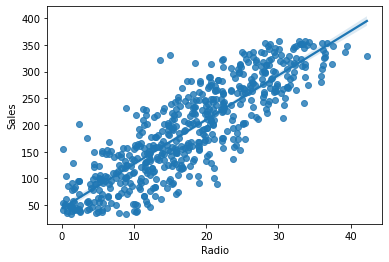

In [35]:
#checking the model assumption this will help confirm your findings.

# plot the OLS data with the best fit regression line

sns.regplot(x = "Radio", y = "Sales", data = ols_data)

In [42]:
# get the residuals from the model

residuals = model.resid

residuals

0     -17.817004
1     -40.684714
2      59.478221
3     -15.673594
4     -32.634439
         ...    
567    25.994900
568    20.438417
569     6.910957
570    -9.844248
571   -17.839686
Length: 572, dtype: float64

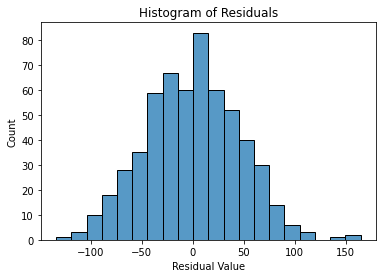

In [37]:
# visualize the distribution of the residuals

fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

Residuals is approximately normal.This shows that the assumption of normality is likely met.

In [ ]:
# Create a Q-Q plot 

sm.qqplot(residuals, line='s')
plt.title("Q-Q plot of Residuals")
plt.show()

The points closely follow a straight diagonal line trending upward. This confirms that the normality assumption is met.

In [43]:
#assumptions of independent observation and homoscedasticity.

#get fitted values

fitted_values = model.predict(ols_data["Radio"])


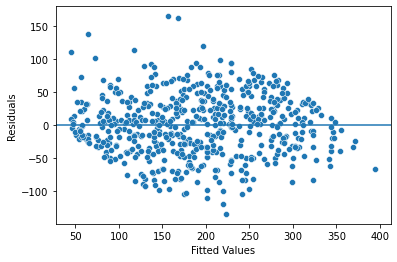

In [44]:
#create a scatterplot of residuals against fitted values

fig = sns.scatterplot(x=fitted_values, y=residuals)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

Residuals appear to be randomly spaced, the homoscedasticity assumption seems to be met.

P-value is 0.000 and smaller than the common significance level of 0.05
There is a 95% probability that the interval [7.791, 8.555] contains the true value for the slope.
1 million dollar increase in radio promotion budget could generate average a 8.1733 million dollar increase in sales